# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [1]:
#Write your code here, You may need to use python open() function to open the file and load data.
import numpy as np
import pandas as pd
import seaborn as sns
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data from json file
df = open("yearinfo.json")
yearinfo = json.load(df)
print(yearinfo)


{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

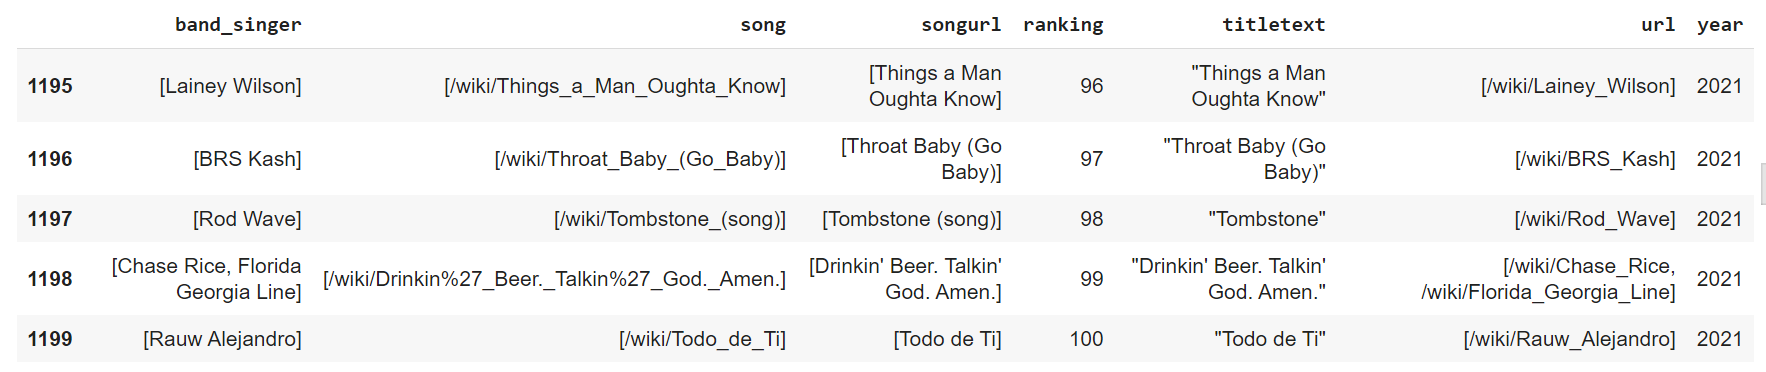

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [2]:
#write your code here
#creating list
data_list = []
for key, values in yearinfo.items():
  for i in values:
    data_list.append(list(i.values()) + [key])


In [3]:
#creating column for dataframe
column = list(yearinfo['2010'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

In [4]:
#creating dataframe
df = pd.DataFrame(data_list,columns=column)
df

band_singer  \
0                                [Kesha]   
1                      [Lady Antebellum]   
2                         [Train (band)]   
3               [Katy Perry, Snoop Dogg]   
4          [Usher (musician), Will.i.am]   
...                                  ...   
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
0                            [/wiki/Tik_Tok_(song)]   
1       [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                          [/wiki/Hey,_Soul_Sister]   
3                          [/wiki/California_Gurls]   
4                          [/wiki/OMG_(Usher_song)]   
...                                             ...   
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                    songurl  ranking  \
0                          [Tik Tok (song)]        1   
1     [Need You Now (Lady Antebellum song)]        2   
2                        [Hey, Soul Sister]        3   
3                        [California Gurls]        4   
4                        [OMG (Usher song)]        5   
...                                     ...      ...   
1195             [Things a Man Oughta Know]       96   
1196                [Throat Baby (Go Baby)]       97   
1197                     [Tombstone (song)]       98   
1198    [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                           [Todo de Ti]      100   

                                titletext  \
0                               "Tik Tok"   
1                          "Need You Now"   
2                      "Hey, Soul Sister"   
3                      "California Gurls"   
4                                   "OMG"   
...                                   ...   
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
0                                      [/wiki/Kesha]  2010  
1                            [/wiki/Lady_Antebellum]  2010  
2                               [/wiki/Train_(band)]  2010  
3               [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4          [/wiki/Usher_(musician), /wiki/Will.i.am]  2010  
...                                              ...   ...  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021  

[1200 rows x 7 columns]

In [5]:
#To get last n rows
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

# Cleaning the DataFrame

In [6]:
df.isnull().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

### No need to clean  as there is no null value and missing value

In [7]:
#create a function to remove list from the dataset
def fetch_list_value(list_name):
    value = list_name[0]
    return value

df['band_singer'] = df.band_singer.map(fetch_list_value)
df['song'] = df.song.map(fetch_list_value)
df['songurl'] = df.songurl.map(fetch_list_value)
df['url'] = df.url.map(fetch_list_value)

In [8]:
df

band_singer                                         song  \
0                Kesha                         /wiki/Tik_Tok_(song)   
1      Lady Antebellum    /wiki/Need_You_Now_(Lady_Antebellum_song)   
2         Train (band)                       /wiki/Hey,_Soul_Sister   
3           Katy Perry                       /wiki/California_Gurls   
4     Usher (musician)                       /wiki/OMG_(Usher_song)   
...                ...                                          ...   
1195     Lainey Wilson               /wiki/Things_a_Man_Oughta_Know   
1196          BRS Kash                  /wiki/Throat_Baby_(Go_Baby)   
1197          Rod Wave                       /wiki/Tombstone_(song)   
1198        Chase Rice  /wiki/Drinkin%27_Beer._Talkin%27_God._Amen.   
1199    Rauw Alejandro                             /wiki/Todo_de_Ti   

                                  songurl  ranking  \
0                          Tik Tok (song)        1   
1     Need You Now (Lady Antebellum song)        2   
2                        Hey, Soul Sister        3   
3                        California Gurls        4   
4                        OMG (Usher song)        5   
...                                   ...      ...   
1195             Things a Man Oughta Know       96   
1196                Throat Baby (Go Baby)       97   
1197                     Tombstone (song)       98   
1198    Drinkin' Beer. Talkin' God. Amen.       99   
1199                           Todo de Ti      100   

                                titletext                     url  year  
0                               "Tik Tok"             /wiki/Kesha  2010  
1                          "Need You Now"   /wiki/Lady_Antebellum  2010  
2                      "Hey, Soul Sister"      /wiki/Train_(band)  2010  
3                      "California Gurls"        /wiki/Katy_Perry  2010  
4                                   "OMG"  /wiki/Usher_(musician)  2010  
...                                   ...                     ...   ...  
1195           "Things a Man Oughta Know"     /wiki/Lainey_Wilson  2021  
1196              "Throat Baby (Go Baby)"          /wiki/BRS_Kash  2021  
1197                          "Tombstone"          /wiki/Rod_Wave  2021  
1198  "Drinkin' Beer. Talkin' God. Amen."        /wiki/Chase_Rice  2021  
1199                         "Todo de Ti"    /wiki/Rauw_Alejandro  2021  

[1200 rows x 7 columns]

In [9]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [10]:
#converting year datatypes to int
df['year'] = df['year'].astype(int)

In [11]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int32
dtype: object

In [12]:
#To get last n rows
df.tail()

band_singer                                         song  \
1195   Lainey Wilson               /wiki/Things_a_Man_Oughta_Know   
1196        BRS Kash                  /wiki/Throat_Baby_(Go_Baby)   
1197        Rod Wave                       /wiki/Tombstone_(song)   
1198      Chase Rice  /wiki/Drinkin%27_Beer._Talkin%27_God._Amen.   
1199  Rauw Alejandro                             /wiki/Todo_de_Ti   

                                songurl  ranking  \
1195           Things a Man Oughta Know       96   
1196              Throat Baby (Go Baby)       97   
1197                   Tombstone (song)       98   
1198  Drinkin' Beer. Talkin' God. Amen.       99   
1199                         Todo de Ti      100   

                                titletext                   url  year  
1195           "Things a Man Oughta Know"   /wiki/Lainey_Wilson  2021  
1196              "Throat Baby (Go Baby)"        /wiki/BRS_Kash  2021  
1197                          "Tombstone"        /wiki/Rod_Wave  2021  
1198  "Drinkin' Beer. Talkin' God. Amen."      /wiki/Chase_Rice  2021  
1199                         "Todo de Ti"  /wiki/Rauw_Alejandro  2021

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [13]:
#write your code here
#Write your program and plot bar graph
quality_counts = df.band_singer.value_counts() 
#Singers appear more than 15 times
quality_bands = quality_counts[quality_counts.values>15]
quality_bands

Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Name: band_singer, dtype: int64

C:\Users\SonamCheda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


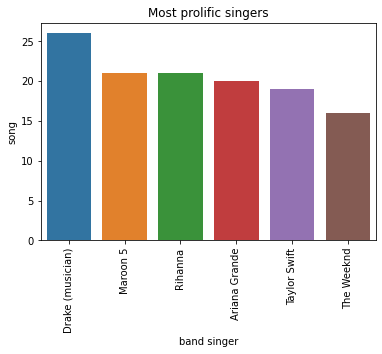

In [14]:
#ploting the bar graph
sns.barplot(quality_bands.index, quality_bands.values,)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.title("Most prolific singers");
plt.show()

**Question: Who is the most profilic singer?**


From the above graph I conclude that the most profilic singer is Drake(musician) which appered 26 times

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [15]:
#write your code here
#adding total_score colum in the datapoint
df['Total_score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  Total_score  
0             /wiki/Kesha  2010          100  
1   /wiki/Lady_Antebellum  2010           99  
2      /wiki/Train_(band)  2010           98  
3        /wiki/Katy_Perry  2010           97  
4  /wiki/Usher_(musician)  2010           96

C:\Users\SonamCheda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


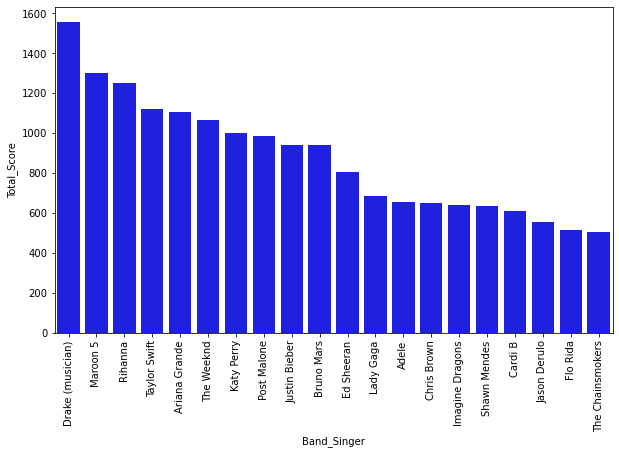

In [16]:
#ploting grapg
new_ranking = df.groupby('band_singer').Total_score.sum().sort_values(ascending = False)
top_20 = new_ranking.head(20)
bar_plot2 = plt.figure(figsize = (10,6))
sns.barplot(top_20.index, top_20.values, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Band_Singer')
plt.ylabel('Total_Score');
plt.show()


**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Yes, there is a major difference in position, starting from the 4th place the singer's name is changed because it was based on the total score of a singer whereas the first graph label was based on the number of the appearance of the singer name 

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

# Question
### Which band_signger write the song most in the year 2010?

In [17]:
#write your solution from here
#To check the total group of year
len(df.groupby('year'))

12

In [18]:
#creating a new dataframe from df dataframe
data = df[['band_singer','ranking','year']]
#Grouping by year
year = data.groupby('year')
#Selecting particular group(2010) list
year = year.get_group(2010)
year

band_singer  ranking  year
0                Kesha        1  2010
1      Lady Antebellum        2  2010
2         Train (band)        3  2010
3           Katy Perry        4  2010
4     Usher (musician)        5  2010
..                 ...      ...   ...
95     Daughtry (band)       96  2010
96       Uncle Kracker       97  2010
97  Cali Swag District       98  2010
98         Alicia Keys       99  2010
99      Jerrod Niemann      100  2010

[100 rows x 3 columns]

In [19]:
# Finding highest frequency over particular group(2010)
highest_frequency = year['band_singer'].value_counts().sort_values(ascending = False)
highest_frequency


Kesha                  4
Usher (musician)       4
Lady Gaga              4
The Black Eyed Peas    4
B.o.B                  3
                      ..
Sara Bareilles         1
Daughtry (band)        1
Uncle Kracker          1
Cali Swag District     1
Jerrod Niemann         1
Name: band_singer, Length: 67, dtype: int64

In [20]:
#taking the top 10 higest singer
top_10_2010 = highest_frequency.head(10)
top_10_2010

Kesha                  4
Usher (musician)       4
Lady Gaga              4
The Black Eyed Peas    4
B.o.B                  3
Drake (rapper)         3
Jason Derulo           3
Rihanna                3
Taylor Swift           3
Jay-Z                  2
Name: band_singer, dtype: int64

In [21]:
# Converting series to DataFrame
year2010 = pd.DataFrame(top_10_2010)
year2010

band_singer
Kesha                          4
Usher (musician)               4
Lady Gaga                      4
The Black Eyed Peas            4
B.o.B                          3
Drake (rapper)                 3
Jason Derulo                   3
Rihanna                        3
Taylor Swift                   3
Jay-Z                          2

# visualizations

C:\Users\SonamCheda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


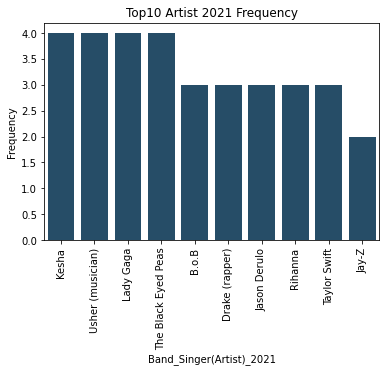

In [22]:
#Plotting Graph 
sns.barplot(top_10_2010.index, top_10_2010.values, color = '#1B4F72')
plt.xticks(rotation=90)
plt.xlabel('Band_Singer(Artist)_2021')
plt.ylabel('Frequency')
plt.title("Top10 Artist 2021 Frequency");


### Above Question answer: 


Ans: *Kesha*, *Usher(musician)*, *Lady Gaga* and *The black Eyed Peas* has the highest frequency in the year 2010

## SUBMISSION DATE: 2nd April 2022 